In [3]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from src.ml_model.preprocess_census import preprocess_census

In [53]:
import json 
import yaml 
# Load config file with yaml
with open("params.yaml") as f:
    config= yaml.safe_load(f)

In [67]:
gb = GradientBoostingClassifier(**params)

TypeError: '<=' not supported between instances of 'list' and 'int'

In [73]:
train_df = pd.read_csv("data/train/train_set.csv")
test_df = pd.read_csv("data/train/test_set.csv") 
x, y, label_encoder, cat_features_encoder, num_features_encoder = preprocess_census(X=train_df,
        target=config['preprocess']['target'],
        do_train=True,
        cat_features=config['preprocess']['categorical_features'], 
        num_features=config['preprocess']['numerical_features'])

In [74]:
x_test, y_test, label_encoder, cat_features_encoder, num_features_encoder = preprocess_census(X=test_df,
        target=config['preprocess']['target'],
        do_train=False,
        cat_features=config['preprocess']['categorical_features'], 
        num_features=config['preprocess']['numerical_features'], 
        label_encoder=label_encoder,
        cat_features_encoder=cat_features_encoder,
        num_features_encoder=num_features_encoder)

In [80]:
x_train , y_train = np.load(config['preprocess']['output_dir']+'/x_train.npy'), \
                    np.load(config['preprocess']['output_dir']+'/y_train.npy') 
x_test , y_test = np.load(config['preprocess']['output_dir']+'/x_test.npy'), \
                    np.load(config['preprocess']['output_dir']+'/y_test.npy') 


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier(**res.best_params_) 
# model = LogisticRegression() 


In [87]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=3)

In [92]:
gb.score(x_test, y_test)

0.8392445877475817

In [105]:
from sklearn.metrics import fbeta_score, precision_score, recall_score

preds = gb.predict(x_test)
fbeta = fbeta_score(y_test, preds, beta=0, zero_division=1)
precision = precision_score(y_test, preds, zero_division=1)
recall = recall_score(y_test, preds, zero_division=1)
precision, recall, fbeta

(0.6960183767228177, 0.5830660679923028, 0.6345549738219896)

In [30]:
params= {'learning_rate':[0.1,0.01], 'max_depth':[3,4,5], 'min_samples_leaf':[1,2],
        'min_samples_split':[2], 'n_estimators':[10,50,100]}

gcv = GridSearchCV(gb, params)



In [31]:
res = gcv.fit(x_train,y_train)

In [33]:
gd_best = GradientBoostingClassifier(**res.best_params_)

In [82]:
res.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [35]:
gd_best.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, min_samples_split=3)

In [52]:
import joblib

In [ ]:
joblib

In [43]:
gd_best.score(x_test, y_test)

0.8409335175802242

In [51]:
label_encoder.inverse_transform().tolist()

[' <=50K']

In [14]:
model_name = model.__class__.__name__
preds = model.predict(x_test, )


In [93]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,preds, target_names=label_encoder.classes_,output_dict=True)
cr = pd.DataFrame(cr).T
cr.to_json('classification_report.json', indent=2)


In [94]:
cr

,precision,recall,f1-score,support
<=50K,0.875168,0.919863,0.896959,4954.000000
>50K,0.696018,0.583066,0.634555,1559.000000
accuracy,0.839245,0.839245,0.839245,0.839245
macro avg,0.785593,0.751464,0.765757,6513.000000
weighted avg,0.832285,0.839245,0.834148,6513.000000


In [17]:
import logging  
from src.utils.logs import get_logger
logger = get_logger('Train Model', log_level=config['base']['log_level'])

In [21]:
logger.info('Test Report\n'+str(cr))

2023-02-11 14:55:29,527 — Train Model — INFO — Test Report
              precision    recall  f1-score      support
 <=50K         0.873101  0.916633  0.894338  4954.000000
 >50K          0.685213  0.576652  0.626263  1559.000000
accuracy       0.835253  0.835253  0.835253     0.835253
macro avg      0.779157  0.746642  0.760300  6513.000000
weighted avg   0.828127  0.835253  0.830169  6513.000000


In [42]:
gb.predict(x_test)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [37]:
joblib.dump(label_encoder, "artifacts/encoders/label_encoder.gz")


['artifacts/encoders/label_encoder.gz']

In [7]:
label_encoder = joblib.load("artifacts/encoders/label_encoder.gz")

In [8]:
label_encoder = joblib.load("artifacts/encoders/label_encoder.gz")


In [10]:
label_encoder.transform(">=50")

ValueError: Expected array-like (array or non-string sequence), got '>=50'

In [4]:
label_encoder.save  

array([13.64190866, 12.36643302])

In [5]:
train_df.drop(config['preprocess']['categorical_features'],axis=1)

,age,hours-per-week,salary
0,36,50,>50K
1,47,40,>50K
2,51,40,>50K
3,53,40,<=50K
4,51,40,<=50K
...,...,...,...
26043,48,40,>50K
26044,31,45,<=50K
26045,25,40,<=50K
26046,35,45,<=50K


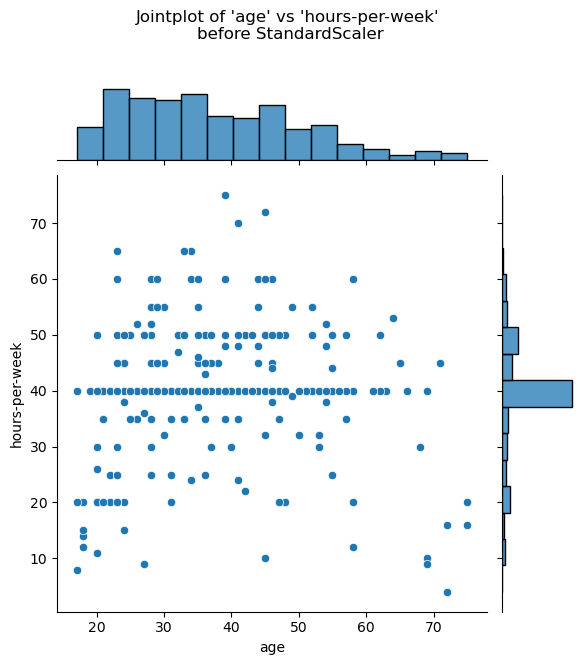

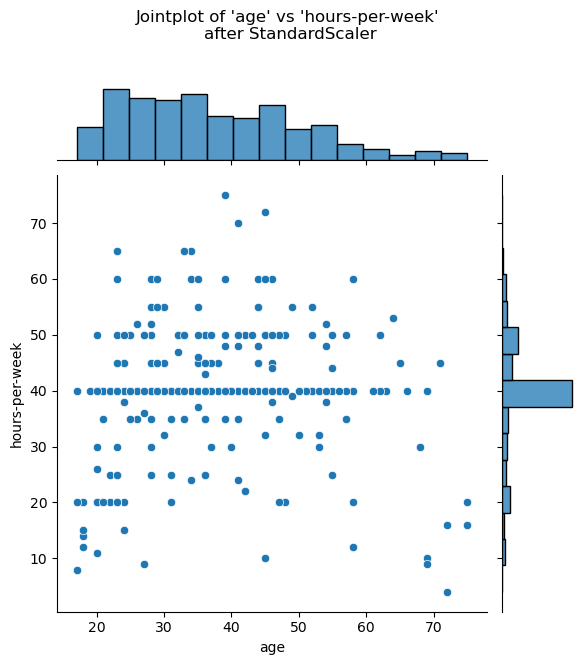

In [6]:
import matplotlib.pyplot  as plt
import seaborn as sns

# number of points to visualize to have a clearer plot
num_points_to_plot = 300

sns.jointplot(data=train_df[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nbefore StandardScaler", y=1.1)

sns.jointplot(data=train_df[:num_points_to_plot], x="age",
              y="hours-per-week", marginal_kws=dict(bins=15))
_ = plt.suptitle("Jointplot of 'age' vs 'hours-per-week' \nafter StandardScaler", y=1.1)